<a href="https://colab.research.google.com/github/pterw/Genomic-Projects/blob/Assignments/Assignment_6_8605690.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Identify yourself here:

Student name: Peter Wiercioch

Student number: 8605690

# BIO3360 Assignment 6#

##  The Hodgkin-Huxley model and modelling neurons ##

We will here examine simplified models desribing neuronal firing, and use tools from dynamical systems and numerical methods to understand the mechanisms at play as well as perform some numerical experiments. These models were designed to better understand how neurons function,  but they can also be used to perform in silico experiments to test different hypothesis, relying solely on numerical and mathematical simulations. 

IMPORTANT REMINDER: Copy-pasting code found online will be considered as plagiarism. And this is easy to verify (trust me!).  

Below is a series of questions that need to be answered. Your "answers" are to be written in the code cells below the question statements. To get points, the output of your code cell must match the expected answer. If you need to anotate your code cell, or make comments use `#` before your comment. The line will be ignored by the compiler, but remain visible. E.g. `#this is a comment`

**Word of caution: Colab's compiler keep track of assignments, even if they are in different code cells. This means that if you make changes to a variable in a cell, it will impact how this variable is used in all other cells. To avoid mixing them up, you can either change your variable names in every code cell, or redefine them at the value you want at the beginning of every new code cell. Note that this hold not only for variables but also functions, libraries etc that were defined in a previous code cell. As mentioned before, that works because all required information is stored in memory. It is critical that you remain aware of the implications of this...especially when you having been working on an assignment, or other code, for a long time!**

First, please write your name and student number in the text cell above.

###Question 1 (3 points)

The HH model is non linear and does not possess an explicit solution. As more and more ionic conductances are added, the level of complexity increases dramatically and only numerical methods are possible.

Much of the richness of the HH model vomes from the presence of a cubic non-linearity and monotonic recovery function (𝑛). In 1961, Dick Fitzhugh proposed a reduced model that grasp the oscillatory quality of the HH at the expense of many physiological details. The Fitzhugh-Nagumo model is given by the following set of ODEs:

$$\frac{dV}{dt} = V-V^3/3-w+I$$
$$\frac{dw}{dt} = \epsilon (V+a-b w)$$

where $V$ is the membrane voltage and $w$ is a slow recovery variable representing the inactivation of ion channels - namely some form of neural fatigue that prevents the neuron from staying permanently depolarized. The parameters $a$, $\epsilon$ and $\gamma$ are parameters that are oftentimes fit to data and do not possess a clear biological meaning. The additional term $I$ represents the input - either from an experimental electrode or other neurons. 

The Fitzhugh-Nagumo model is very useful to understand the dynamical "machinery" (i.e. the fundamental processes) at play in action potential generation, and is furthermore amenable to analytics (i.e. it is mathematically tractable).

Let us consider the following parameters: $a=0.7, b=0.8$ and $\epsilon=0.3$. 

a)(0.5 point) Find the nullclines of the FHN model above for $I=0$. (HINT: Instead of solving for $V$, solve for $w$)`#type your answer as a commentary in the code cell below`

b)(0.5 point) Plot the nullclines in the $(V,w)$ plane for $V$ and $w$ ranging from -4 to 4. Dont forget axes labels and title!  (HINT: use the commands `plt.ylim(-4,4)` and `plt.xlim(-4,4)`).

c)(0.5 point)Using the Euler method, numerically integrate the FHN model for $I=0$ and plot the solution $V(t)$ as a function of time over the interval 0 to 100ms with steps of $dt=0.01$. Initial conditions are $V(0)=0.1$ and $w(0)=0.1$.

d)(0.5 point) Using the code youve written in c), examine the effect of gradually increasing the input to the neuron $I$ from 0 to 1.2 by steps of 0.1. What do you notice? What is going on?`#type your answer as a commentary in the code cell below`

e)(1 point) Plot the flow in phase space alongside the nullclines calculated in b) (HINT: As seen in class, all is needed is to integrate the system for a small amount of time, say 0.1 with steps of $dt=0.01$. Using two embedded `for` loops, you can simply change the initial conditions and plot the trajectories in $(V,w)$ space iteratively). What is the effect of changing $I$ on the flow and on the nullclines?



`#a)
Nullclines for I = 0

Equation 1:

$$0 = V - V^3/3 - w + I$$
$$ w = V - V^3/3$$

Equation 2:

$$ 0 = e(V+a-bw) $$

$$ 0 = V + a - bw $$

$$ bw = V + a $$

$$ w = \frac{V+a}b $$


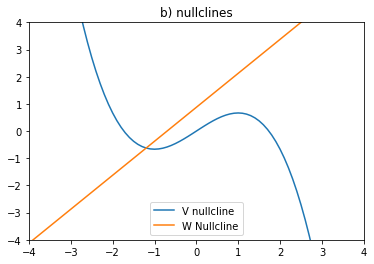

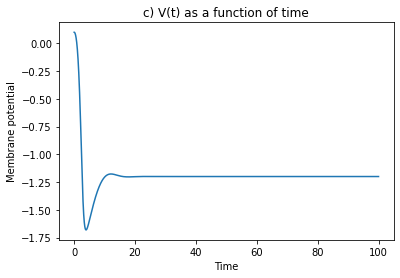

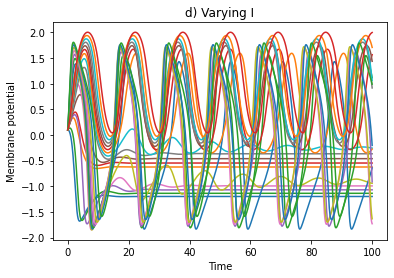

In [ ]:
#b)

import numpy as np
import matplotlib.pyplot as plt

[a,b,e] = [0.7,0.8,0.3]
V = np.arange(-4,4,0.1)
w = np.arange(-4,4,0.1)

null_V = V-((V**3)/3)
null_w = (V+a)/b

plt.ylim(-4,4)
plt.xlim(-4,4)
plt.plot(V, null_V, label= 'V nullcline')
plt.plot(V, null_w, label='W Nullcline')
plt.legend()
plt.title('b) nullclines')
plt.show()


#c)
import numpy as np
import matplotlib.pyplot as plt

T = 100 #ms
dt = 0.01
time=np.arange(0,T,dt)

V=np.zeros(len(time))
w=np.zeros(len(time))

V[0] = 0.1
w[0] = 0.1

[a,b,e] = [0.7,0.8,0.3]

I = 0

for i in range(len(time)-1):
  w[i+1] = w[i] + dt * (e * (V[i] + a - b * w[i]))
  V[i+1] = V[i] + dt * (V[i] - (V[i]**3)/3 - w[i] + I)

plt.plot(time,V)
plt.title('c) V(t) as a function of time')
plt.xlabel('Time')
plt.ylabel('Membrane potential')
plt.show()

#d) Changing the I changes the rate at which action potentials fire, as I increases so does the firing rate of the action potentials.

I = np.arange(0,1.2,0.1)
for j in range(len(I)):
  for i in range(len(time)-1):
    w[i+1] = w[i] + dt * (e * (V[i] + a - b * w[i]))
    V[i+1] = V[i] + dt * (V[i] - (V[i]**3)/3 - w[i] + I[j])
  plt.plot(time,V)
  plt.plot(time,w)
plt.title('d) Varying I')
plt.xlabel('Time')
plt.ylabel('Membrane potential')
plt.show()

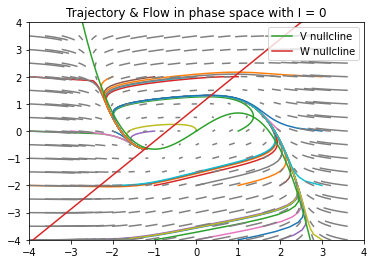

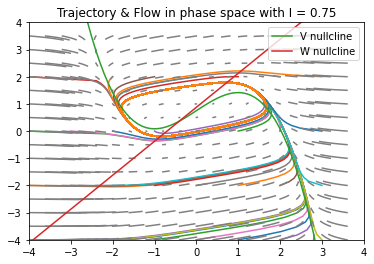

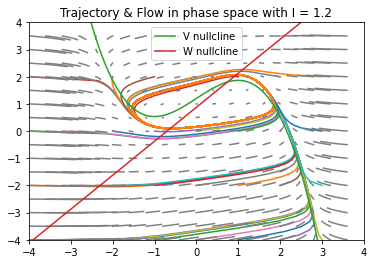

In [ ]:
#e) 
# As I changes, the trajcetories change and we see a change in the fixed point due to change in the nullcine V, resulting in a dynamical transition where the fixed point becomes unstable. 
# This yields a limit-cylce and an oscillatory solution if it crosses the threshold it will not be able to escape. The flow changes correspondingly to the changing trajectories, displaying oscillatory behaviour.
# Any solution for that particular system will converge to the limit cycle in phase-space, giving rise to repeated action potential firing. 

import numpy as np
import matplotlib.pyplot as plt

dt=0.1
time=np.arange(0,500,dt)
V=np.zeros(len(time))
w=np.zeros(len(time))

[a,b,e] = [0.7,0.8,0.3]

I=0

for i in np.arange(-4,4,1):
    for j in np.arange(-4,4,2):
      for t in range(len(time)-1):
        V[0]=i
        w[0]=j
        w[t+1] = w[t] + dt * (e * (V[t] + a - b * w[t]))
        V[t+1] = V[t] + dt * (V[t] - (V[t]**3)/3 - w[t] + I)
      plt.plot(V,w)
dt=0.01
time=np.arange(0,0.1,dt)
V=np.zeros(len(time))
w=np.zeros(len(time))

for i in np.arange(-4,4,0.4):
    for j in np.arange(-4,4,0.5):
      for t in range(len(time)-1):
        V[0]=i
        w[0]=j
        w[t+1] = w[t] + dt * (e * (V[t] + a - b * w[t]))
        V[t+1] = V[t] + dt * (V[t] - (V[t]**3)/3 - w[t] + I)
      plt.plot(V,w,color='grey')
Vw = np.arange(-4,4,0.1)
ww = np.arange(-4,4,0.1)

null_V = Vw-((Vw**3)/3)+I
null_w = (Vw+a)/b

plt.plot(Vw, null_V,label='V nullcline')
plt.plot(Vw, null_w,label='W nullcline')
plt.title('Trajectory & Flow in phase space with I = 0')
plt.legend()

plt.ylim(-4,4)
plt.xlim(-4,4)
plt.show()

#for I = 1

dt=0.1
time=np.arange(0,500,dt)
V=np.zeros(len(time))
w=np.zeros(len(time))

[a,b,e] = [0.7,0.8,0.3]

I=0.75

for i in np.arange(-4,4,1):
    for j in np.arange(-4,4,2):
      for t in range(len(time)-1):
        V[0]=i
        w[0]=j
        w[t+1] = w[t] + dt * (e * (V[t] + a - b * w[t]))
        V[t+1] = V[t] + dt * (V[t] - (V[t]**3)/3 - w[t] + I)
      plt.plot(V,w)
dt=0.01
time=np.arange(0,0.1,dt)
V=np.zeros(len(time))
w=np.zeros(len(time))

for i in np.arange(-4,4,0.4):
    for j in np.arange(-4,4,0.5):
      for t in range(len(time)-1):
        V[0]=i
        w[0]=j
        w[t+1] = w[t] + dt * (e * (V[t] + a - b * w[t]))
        V[t+1] = V[t] + dt * (V[t] - (V[t]**3)/3 - w[t] + I)
      plt.plot(V,w,color='grey',)
Vw = np.arange(-4,4,0.1)
ww = np.arange(-4,4,0.1)
I = 0.75
null_V = Vw-((Vw**3)/3)+I
null_w = (Vw+a)/b

plt.plot(Vw, null_V,label='V nullcline')
plt.plot(Vw, null_w,label='W nullcline')
plt.title('Trajectory & Flow in phase space with I = 0.75')
plt.legend()

plt.ylim(-4,4)
plt.xlim(-4,4)
plt.show()

dt=0.1
time=np.arange(0,500,dt)
V=np.zeros(len(time))
w=np.zeros(len(time))

I=1.2

for i in np.arange(-4,4,1):
    for j in np.arange(-4,4,2):
      for t in range(len(time)-1):
        V[0]=i
        w[0]=j
        w[t+1] = w[t] + dt * (e * (V[t] + a - b * w[t]))
        V[t+1] = V[t] + dt * (V[t] - (V[t]**3)/3 - w[t] + I)
      plt.plot(V,w)
dt=0.01
time=np.arange(0,0.1,dt)
V=np.zeros(len(time))
w=np.zeros(len(time))

for i in np.arange(-4,4,0.4):
    for j in np.arange(-4,4,0.5):
      for t in range(len(time)-1):
        V[0]=i
        w[0]=j
        w[t+1] = w[t] + dt * (e * (V[t] + a - b * w[t]))
        V[t+1] = V[t] + dt * (V[t] - (V[t]**3)/3 - w[t] + I)
      plt.plot(V,w, color='grey')
Vw = np.arange(-4,4,0.1)
ww = np.arange(-4,4,0.1)
I=1.2
null_V = Vw-((Vw**3)/3)+I
null_w = (Vw+a)/b

plt.plot(Vw, null_V,label='V nullcline')
plt.plot(Vw, null_w,label='W nullcline')
plt.title('Trajectory & Flow in phase space with I = 1.2')
plt.legend()
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.show()


###Question 2 (4 points)

One step forward more simplified neuron modelling is the "Integrate and Fire" model. Here, a neuron is reduced to its most basic function: fire action potentials, or not. Most of the physiological and mathematical richness of the Hodgkin-Huxley model (and the FHN model as per Question 1, to some extent) is removed for the benefit of computational efficiency. This becomes important as the number of neurons in a simulation increases to match what is seen in neural tissue (about $10^5$ per mm$^3$!). 

In its most basic form, the Integrate and Fire neuron obeys the following ODE

$$\frac{dV}{dt} = -(V-V_{reset})+I$$

(notice the similarity with exponential growth models!) 

However, once the membrane potential $V$ crosses some threshold value $V_o$, a spike is sais to have occured, and the membrane potential is reset to some baseline value $V_{reset}$. For the purpose of this exercise the threshold for spiking is $V_o=-30$mV, and the reset potential if $V_reset=-80$mV 

a) (2 point) A sequence of action potentials in time is called a "spike train" (call it `X`). During the simulation of the integrate and fire model, the timing of action potentials (i.e. when the membrane potential crosses the threshold) is "saved" : if a spike occured at time step $t$, the spike train value for that time is equal to 1 (i.e. `X=1`). If no spike occured for that time step, that value is zero (i.e. `X=0`).  Using the Euler method and for an input value of $I=70$mV, integrate the system and plot the spike train `X` as a function of time for a duration of 10ms with time steps of $dt=0.01$. The initial condition is V(0)=V_reset. 

b)(2 points) A way to characterize neural responses is through the so-called "frequency response" curve. Generally, the more input delivered to a cell, the more active it will becomes (i.e. it will fire more action potentials per unit time, hence the use of the word frequency). Using your numerical integration scheme developped in a), use a `for` and count the number of action potentials fired as a function of I. Plot the frequency response curve of neuron for inputs $I$ ranging from 0 to 100mV by steps of 1mV.



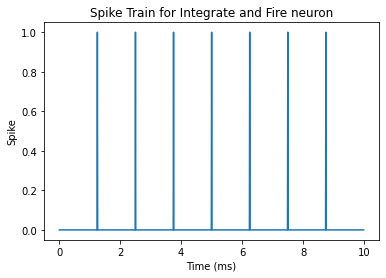

In [ ]:
#a)

import numpy as np
import matplotlib.pyplot as plt

tmax=10 
dt=0.01

time=np.arange(0,tmax,dt)

[a,b,e] = [0.7,0.8,0.3]

V0 = -30
V_reset = -80
I = 70

V=np.zeros(len(time))
V[0] = V_reset

x=[0]
for i in range (len(time)-1):
  V[i+1] = V[i] + dt * (-(V[i]-V_reset)+I)
  if (V[i+1]>=V0):
    x.append(1)
  else:
    x.append(0)
  if (V[i+1] >= V0):
    V[i+1] = V_reset

plt.plot(time,x)
plt.title('Spike Train for Integrate and Fire neuron')
plt.xlabel('Time (ms)')
plt.ylabel('Spike')
plt.show()

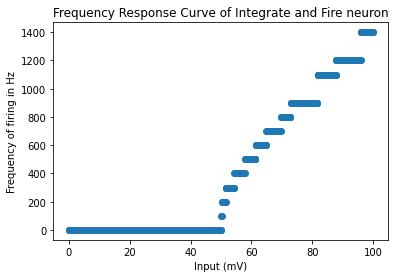

In [ ]:
#B)
import numpy as np
import matplotlib.pyplot as plt

dt = 0.1
tmax = 10

V0 = -30
V_reset = -80

[a,b,e] = [0.7,0.8,0.3]

I = np.arange(0,100,0.1)
time=np.arange(0,tmax,dt)

V=np.zeros(len(time))

V[0] = V_reset

aps=np.zeros(len(I))

for i in range(len(I)):
  spikes=0
  for t in range(len(time)-1):
      V[t+1] = V[t] + dt*(-(V[t]-V_reset)+I[i])
      if V[t+1]>V0:
        V[t+1] = V_reset
        spikes+=1
  aps[i]=(spikes/(tmax/1000))

plt.plot(I,aps,'o')
plt.ylabel('Frequency of firing in Hz')
plt.xlabel('Input (mV)')
plt.title('Frequency Response Curve of Integrate and Fire neuron')
plt.show()

###Question 3 (3 points)

Detecting and counting spikes in the Integrate and Fire model is rather straighforward. However, in more realistic experimental settings and/or more elaborate models, detecting a spike is not so easy. This is because, in the FHN model in Question 1 for instance, the voltage $V$ changes smoothly, so defining a hard "threshold" becomes tricky. 

a) (2 points) To see the presence of a spike (an action potential), we need to detect sudden changes in the membane potential ($V$). Using an `if` statement, detect the presence of an action potential in the FHN model for $I=0.8$ by printing the value of the time at which the spike occured. Use a threshold value of $V_o=1.0$. (HINT: As you will notice, using the same conditional statement as in Question 2 (`if (V[t]>V_o)`) will generate all values of t for which `V[t]` exceeds `V_o`. What could be done to get only the crossing point? Idea: `V[t]<V_o` and `V[t+1]>V_o`).

b) (1 points) Using your numerical integration scheme developped in b), use a `for` loop and plot the frequency response curve for the FHN model, for all $I$ ranging from 0 to 1.2, with steps of 0.1. 

In [ ]:
#a)

import numpy as np
import matplotlib.pyplot as plt

T = 100 #ms
dt = 0.01
time=np.arange(0,T,dt)

V=np.zeros(len(time))
w=np.zeros(len(time))


[a,b,e] = [0.7,0.8,0.3]

V[0] = 0.1
w[0] = 0.1

I = 0.8
V0=1
x=[]

for i in range(len(time)-1):
  w[i+1] = w[i] + dt * (e * (V[i] + a - b * w[i]))
  V[i+1] = V[i] + dt * (V[i] - (V[i]**3)/3 - w[i] + I)
  if (V[i]<V0 and V[i+1]>V0):
    x.append(time[i])

print('Values at which spike occurs',x)


Values at which spike occurs [0.88, 15.97, 31.14, 46.31, 61.49, 76.66, 91.84]


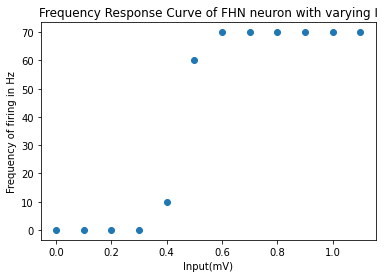

In [ ]:
#b)

import numpy as np
import matplotlib.pyplot as plt

T = 100 #ms
dt = 0.01
time=np.arange(0,T,dt)

V = np.zeros(len(time))
w = np.zeros(len(time))

[a,b,e] = [0.7,0.8,0.3]

V[0] = 0.1
w[0] = 0.1

V0 = 1
I = np.arange(0,1.2,0.1)

aps = np.zeros(len(I))

for i in range(len(I)):
  spikes = 0 
  for j in range(len(time)-1):
    w[j+1] = w[j] + dt * (e * (V[j] + a - b * w[j]))
    V[j+1] = V[j] + dt *(V[j] - (V[j]**3)/3 - w[j] + I[i])
    if V[j] < V0 and V[j+1] > V0:
      spikes += 1
  aps[i] = (spikes/(T/1000))

plt.plot(I, aps, 'o')
plt.xlabel('Input(mV)')
plt.ylabel('Frequency of firing in Hz')
plt.title('Frequency Response Curve of FHN neuron with varying I')
plt.show()